In [18]:
import os
import numpy as np
import cv2 as cv

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
def show_image(title,image):
    cv.imshow(title,image)
    cv.waitKey(0)
    cv.destroyAllWindows()

### Load the dataset

In [20]:
X = [] # images
Y = [] # labels
for cls in range(10):
    class_path = f'cells_dataset/assets/{cls}'
    for img_id in os.listdir(class_path):
        img_path = class_path + '/' + img_id
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # the dataset has white digits and black background
        # so I chose to invert the colors to fit our sudoku 
        # dataset better
        img = cv.bitwise_not(img) 
        X.append(img)
        Y.append(cls)

X = np.array(X) / 255  # normalize
Y = np.array(Y)

X = X.reshape((X.shape[0], 28, 28, 1)).astype('float32')  # reshape
Y = to_categorical(Y)  # one hot encoding

In [21]:
print(X.shape) # (3456, 28, 28, 1)
print(Y.shape) # (3456, 10)

(3456, 28, 28, 1)
(3456, 10)


In [7]:
# test
show_image(f"{np.argmax(Y[500])}", X[500])

### Split the dataset into test and train

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.025, shuffle=True)

print(X_train.shape) # (3369, 28, 28, 1)
print(X_test.shape)  # (87, 28, 28, 1)

(3369, 28, 28, 1)
(87, 28, 28, 1)


### Build the CNN

In [31]:
def create_model():
        cnn = Sequential()
        cnn.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1),
                activation='relu', padding='same'))
        cnn.add(MaxPooling2D((2, 2), padding='same'))
        cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
        cnn.add(MaxPooling2D((2, 2), padding='same'))
        cnn.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
        cnn.add(MaxPooling2D((2, 2), padding='same'))
        cnn.add(Dropout(0.2))
        cnn.add(Flatten())
        cnn.add(Dense(128, activation='relu'))
        cnn.add(Dense(10, activation='softmax'))

        cnn.compile(loss=categorical_crossentropy,
                optimizer='adam', metrics=['accuracy'])
        # cnn.summary()
        return cnn
        
model = create_model()


### Train and store


In [32]:
batch_size = 4
epochs = 20

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

model.save('saved_model/model.h5')


Epoch 1/20
843/843 [==============================] - 3s 3ms/step - loss: 1.9101 - accuracy: 0.2737 - val_loss: 1.2491 - val_accuracy: 0.5977
Epoch 2/20
843/843 [==============================] - 3s 3ms/step - loss: 0.7927 - accuracy: 0.7047 - val_loss: 0.4412 - val_accuracy: 0.8621
Epoch 3/20
843/843 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.8819 - val_loss: 0.4345 - val_accuracy: 0.8506
Epoch 4/20
843/843 [==============================] - 2s 3ms/step - loss: 0.2264 - accuracy: 0.9264 - val_loss: 0.1503 - val_accuracy: 0.9310
Epoch 5/20
843/843 [==============================] - 2s 3ms/step - loss: 0.1546 - accuracy: 0.9522 - val_loss: 0.1543 - val_accuracy: 0.9540
Epoch 6/20
843/843 [==============================] - 2s 3ms/step - loss: 0.1378 - accuracy: 0.9537 - val_loss: 0.1679 - val_accuracy: 0.9425
Epoch 7/20
843/843 [==============================] - 2s 3ms/step - loss: 0.0951 - accuracy: 0.9706 - val_loss: 0.1685 - val_accuracy: 0.9770
Epoch 

### Load and Inference

11/11 - 0s - loss: 0.0836 - accuracy: 0.9827 - 120ms/epoch - 11ms/step
Restored model, accuracy: 98.27%
11/11 [==============================] - 0s 3ms/step


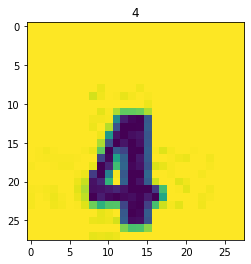

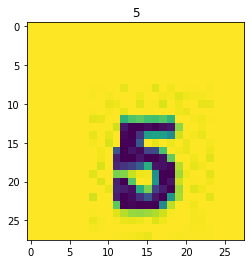

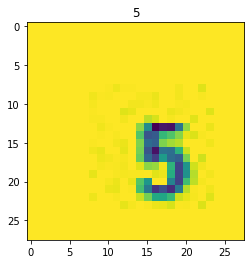

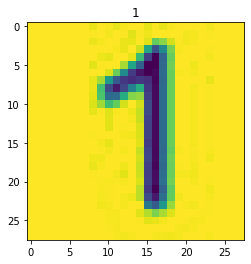

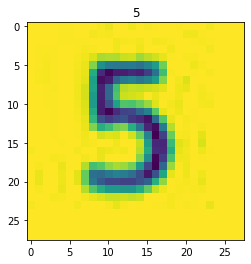

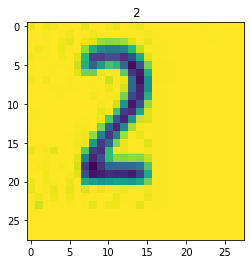

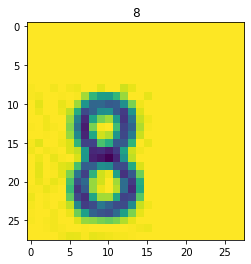

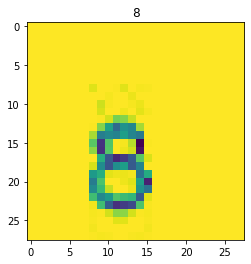

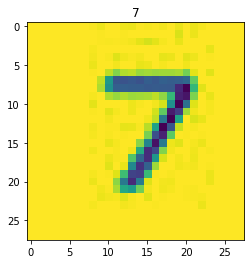

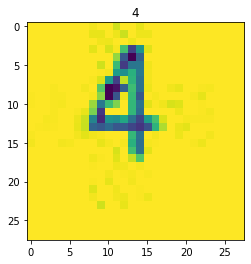

In [83]:
model = tf.keras.models.load_model('saved_model/model.h5')

loss, acc = model.evaluate(X_test, Y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

pred = model.predict(X_test,verbose = 1)

import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(X_test[i])
    plt.title(np.argmax(pred[i]))
    plt.show()

